<a href="https://colab.research.google.com/github/mahaairshad-shu/MechanicsPython2025/blob/main/Week%204/Wk4_Ex1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![SHU](https://drive.google.com/uc?export=view&id=1oauWClN3B2tjg1AeVHtfjAXZg13d9HXL)

#**Modelling Mechanics of Sports Engineering**
##Week 4
###Exercise 1
You have been asked to create a model to simulate a protective foam for use in contact sports. To simulate impact, a 1kg mass is swung at a sample of the foam at 10 ms-1.
The proposed model type is a spring damper and the mass/foam system can be represented as below:


![SD](https://drive.google.com/uc?export=view&id=14sPT2c2z2mGw_VtX-ohcgpgAQF1Vinov)

The spring coefficients are given below, k1 is a non-linear spring and the coefficient increases with deformation.


k1=2000∙x,   
k2=1000,


The client is interested in the model’s response to impact, specifically the amount of energy absorbed during impact.
They have the ability to change the damping of their material according to the following equation:

c=A∙x

Where c is the damping coefficient and x is the displacement of the material.

The company is able to vary the value of A from 10 to 50.

The company are unsure what effect changing damping has on impact response and energy absorbed.
Create a model to simulate a foam impact. Run simulations of impacts on the foam with damping coefficient variable A from 10 to 50 (increasing in increments of 10).

**Extra task:**

Plot the force/displacement curves for each impact, displaying the energy absorbed and the duration of impact.






**Solution 1**

This solution uses a step-wise method using a loop

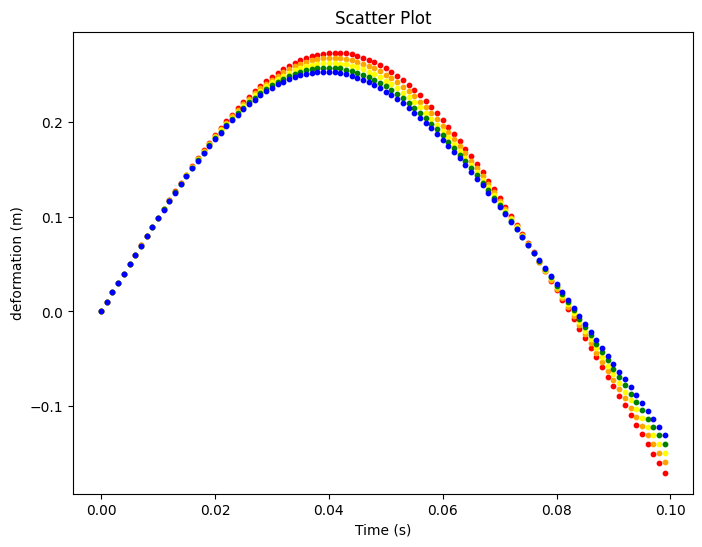

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def springDamperDE(y,A):
  '''
    our differential equation
    y[0] is position
    y[1] is velocity
    dy is the differential of y
    dy[0] is velocity
    dy[1] is acceleration
  '''
  M=1 #mass

  if y[0]<0:
    x=0
  else:
    x=y[0]

  # Forces
  # spring 1 with stiffness k1=2000x. F1=-k1x
  F1=-2000*x*x;

  # spring 2 with stiffness k2=1000. F2=-k2x
  F2=-1000*x;

  # damper with coefficient c=Ax. F3=-Axv
  F3=-A*x*y[1];

  # elements are in parallel
  F=F1+F2+F3;

  # calculate dy
  dy=[0,0]
  dy[0]=y[1]; # velocity equals velocity

  # accleration is force/mass
  dy[1]=F/M;

  return dy

plt.figure(figsize=(8, 6))
plt.title('Scatter Plot')
plt.xlabel('Time (s)')
plt.ylabel('deformation (m)')
colours=['red', 'orange', 'yellow', 'green', 'blue']

count=-1; #just for the plot colours
for A in range(10,60,10):
  count=count+1

  y=[0,10]
  timeGap=0.001

  # for storing the values to use in the plot
  T=[]
  Y=[]
  Vel=[]
  Acc=[]

  for t in np.arange(0,0.1,timeGap):
    T.append(t)
    Y.append(y[0])

    #function makes the loop simple
    dy=springDamperDE(y,A)
    y[0]=y[0]+dy[0]*timeGap
    y[1]=y[1]+dy[1]*timeGap

    Vel.append(dy[0])
    Acc.append(dy[1])


  plt.scatter(T, Y, color=colours[count], marker='o', s=10) #s is markersize

plt.show()





**Solution 2**

This solution uses a solver instead of a loop for increased accuracy

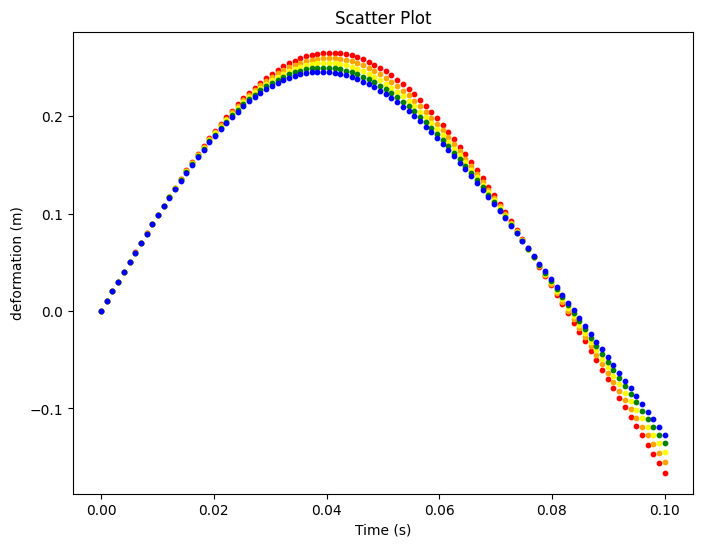

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def springDamperDE(t,y,A): #needs t for the solver
  M=1 #mass

  if y[0]<0:
    x=0
  else:
    x=y[0]

  # Forces
  # spring 1 with stiffness k1=2000x. F1=-k1x
  F1=-2000*x*x;

  # spring 2 with stiffness k2=1000. F2=-k2x
  F2=-1000*x;

  # dampere with coefficient c=Ax. F3=-Axv
  F3=-A*x*y[1];

  # elements are in parallel
  F=F1+F2+F3;

  # calculate dy
  dy=[0,0]
  dy[0]=y[1]; # velocity equals velocity

  # accleration is force/mass
  dy[1]=F/M;

  return dy


colours=['red', 'orange', 'yellow', 'green', 'blue']
plt.figure(figsize=(8, 6))
plt.title('Scatter Plot')
plt.xlabel('Time (s)')
plt.ylabel('deformation (m)')

count=-1;
for A in range(10,60,10):
  count=count+1

  #using solver instead of the loop
  yin=[0,10]
  tEnd=0.1
  sol = solve_ivp(springDamperDE, [0, tEnd], yin, args=(A,), dense_output=True)


  t=np.linspace(0,tEnd,100)
  z = sol.sol(t) #extrtacting the values from the solution
  plt.scatter(t, z[0], color=colours[count], marker='o', s=10) #s is markersize

plt.show()